In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from copy import deepcopy

In [4]:
img = cv2.imread('crack.png', 0)

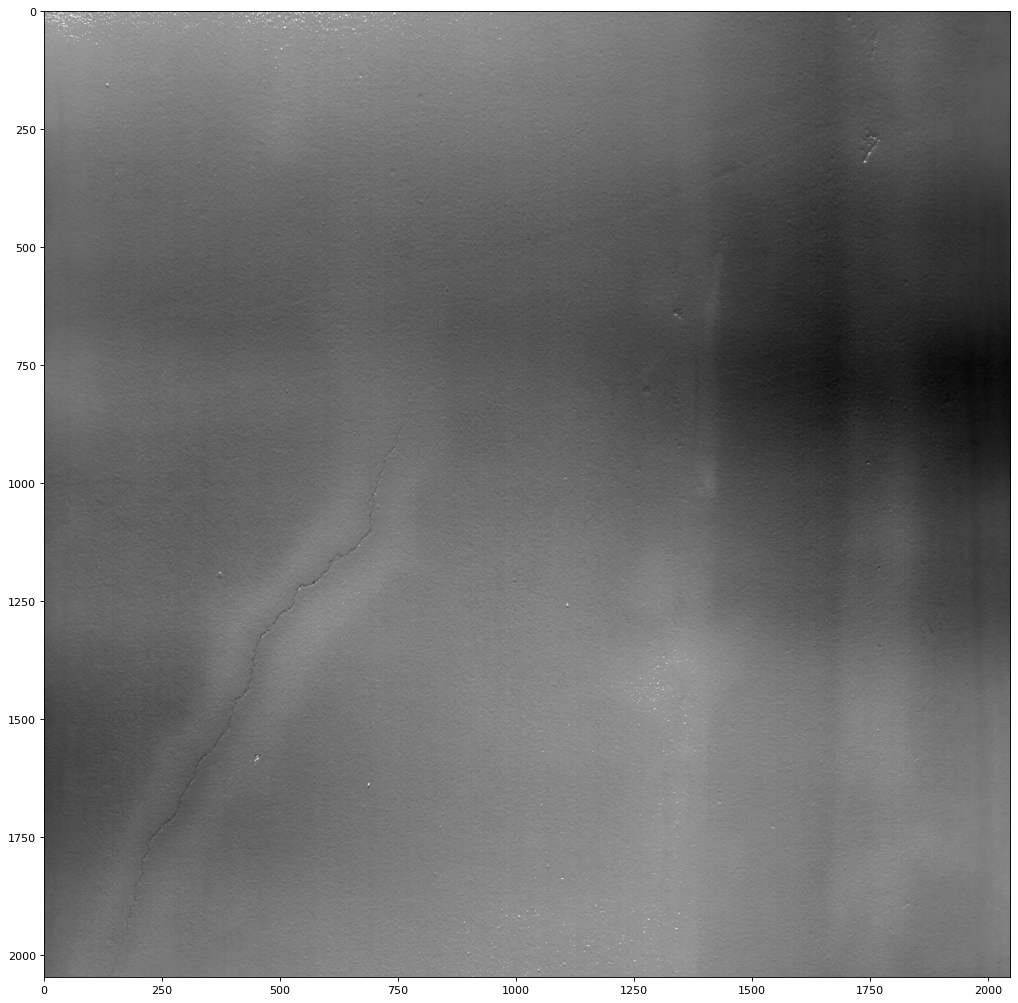

In [5]:
# show image
figure(figsize=(16, 16), dpi=80)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

## Thresholding

In [18]:
img_test = deepcopy(img)
thres = 110

Consider pixel values smaller than threshold are crack pixels.

In [20]:
img_test[img_test<thres] = 0 
img_test[img_test>=thres] = 255

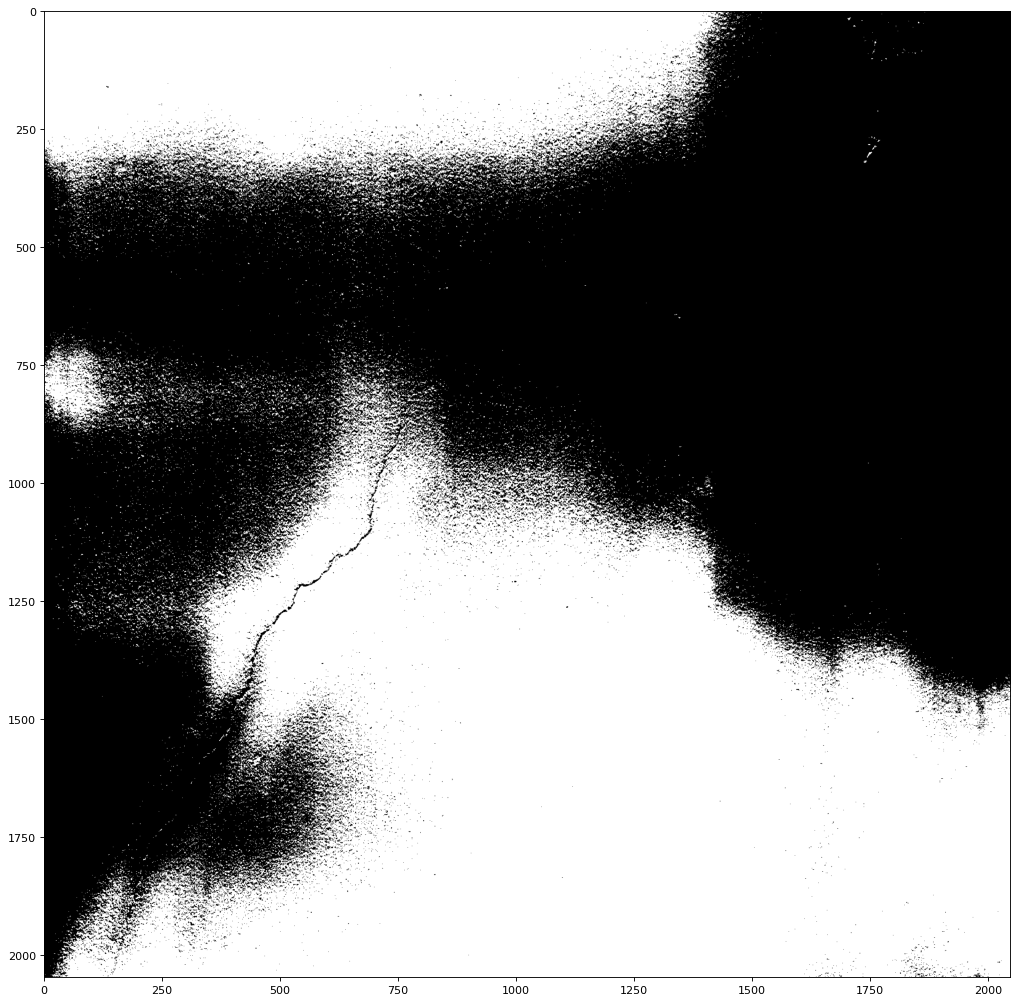

In [21]:
# show image
figure(figsize=(16, 16), dpi=80)
plt.imshow(img_test, cmap='gray', vmin=0, vmax=255)

In [22]:
def calculate_g_mean(patch):
    
    x = deepcopy(patch)
    # x = patch
    
    x_min, x_mean, x_max = np.min(x), np.mean(x), np.max(x)
    
    r_max = x_mean + (x_max - x_mean) * 0.6
    r_min = x_mean - (x_max - x_mean) * 0.6
    
    x[x>r_max] = r_max
    x[x<r_min] = r_min
    out = np.mean(x)
    
    return out

In [31]:
# unify the background
B = 200
p_size = 16
m, n = img.shape[0]//p_size, img.shape[1]//p_size
img_rect = deepcopy(img)
img_rect = img_rect.astype('int')
for i in range(m):
    for j in range(n):
        g_mean = calculate_g_mean(img_rect[i*p_size:i*p_size+p_size, j*p_size:j*p_size+p_size])
        f = B/g_mean
        img_rect[i*p_size:i*p_size+p_size, j*p_size:j*p_size+p_size] = img_rect[i*p_size:i*p_size+p_size, j*p_size:j*p_size+p_size].astype('int') * f
img_rect[img_rect>255] = 255
img_rect = img_rect.astype('uint8')

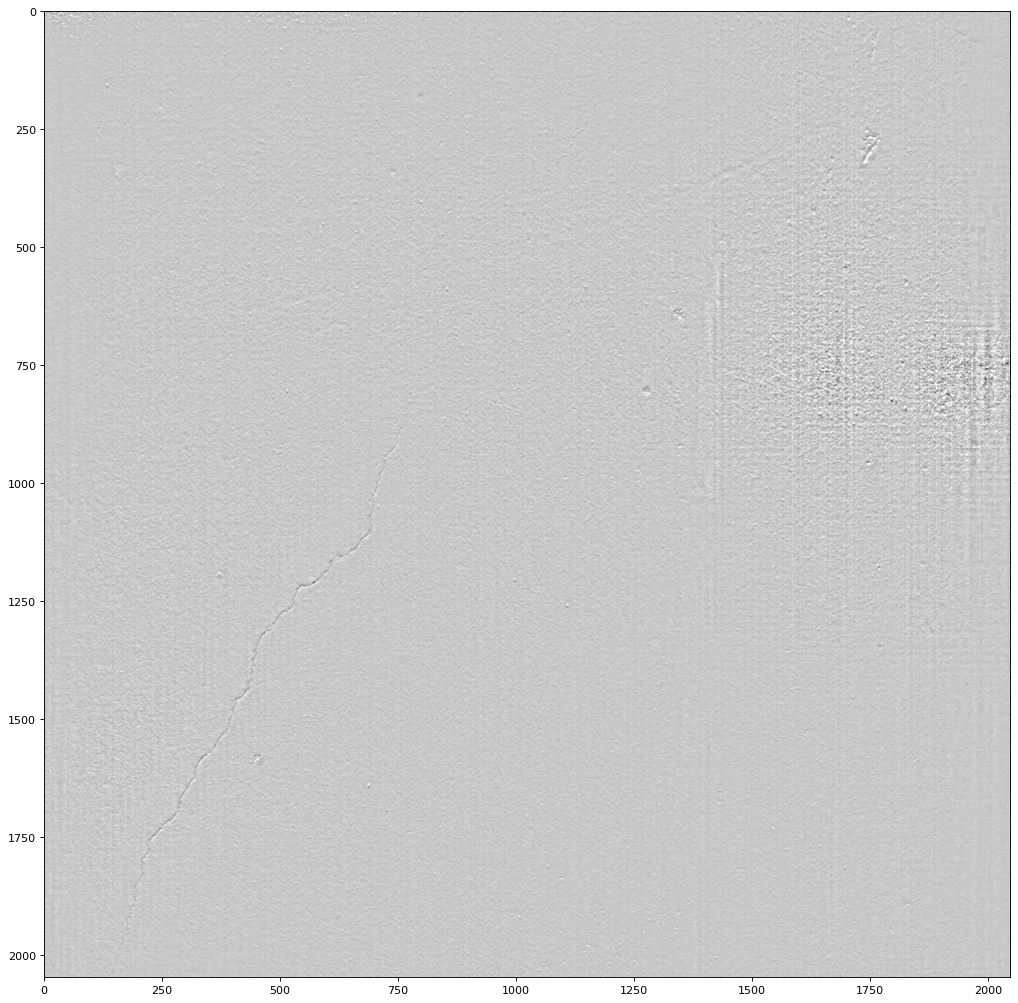

In [28]:
# show image
figure(figsize=(16, 16), dpi=80)
plt.imshow(img_rect, cmap='gray', vmin=0, vmax=255)

In [32]:
thres = 180
img_rect[img_rect<thres] = 0 
img_rect[img_rect>=thres] = 255

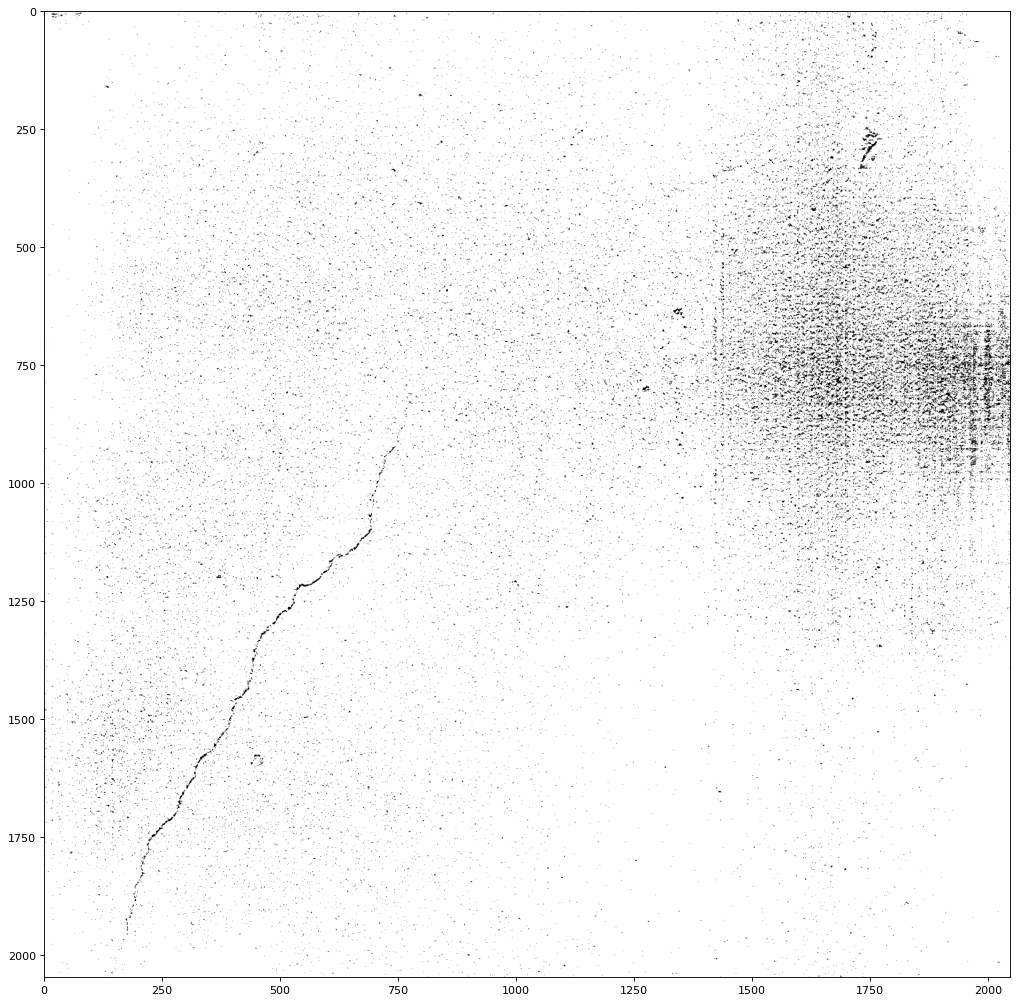

In [33]:
# show image
figure(figsize=(16, 16), dpi=80)
plt.imshow(img_rect, cmap='gray', vmin=0, vmax=255)

## Seed-based crack detection

In [59]:
def extract(img, point):
    area = img[point[0]:point[0]+8,point[1]:point[1]+8 ]
    
    boarder = np.concatenate((area[0,:],area[1:-1, -1], np.flip(area[-1, :]), np.flip(area[1:-1, 0])))
    
    return area, boarder

Unify the background

In [60]:
# unify the background
B = 200
p_size = 8
m, n = img.shape[0]//p_size, img.shape[1]//p_size
img_rect = deepcopy(img)
img_rect = img_rect.astype('int')
for i in range(m):
    for j in range(n):
        g_mean = calculate_g_mean(img_rect[i*p_size:i*p_size+p_size, j*p_size:j*p_size+p_size])
        f = B/g_mean
        img_rect[i*p_size:i*p_size+p_size, j*p_size:j*p_size+p_size] = img_rect[i*p_size:i*p_size+p_size, j*p_size:j*p_size+p_size].astype('int') * f
img_rect[img_rect>255] = 255
img_rect = img_rect.astype('uint8')

In [61]:
sd = np.ones(img_rect.shape) * 255
m, n = img_rect.shape[0]//8, img_rect.shape[1]//8
for i in range(m):
    for j in range(n):
        _, b = extract(img_rect, [i,j])
        if np.max(b) - np.min(b) > 40:
            sd[i*8:i*8+8, j*8:j*8+8] = 0 

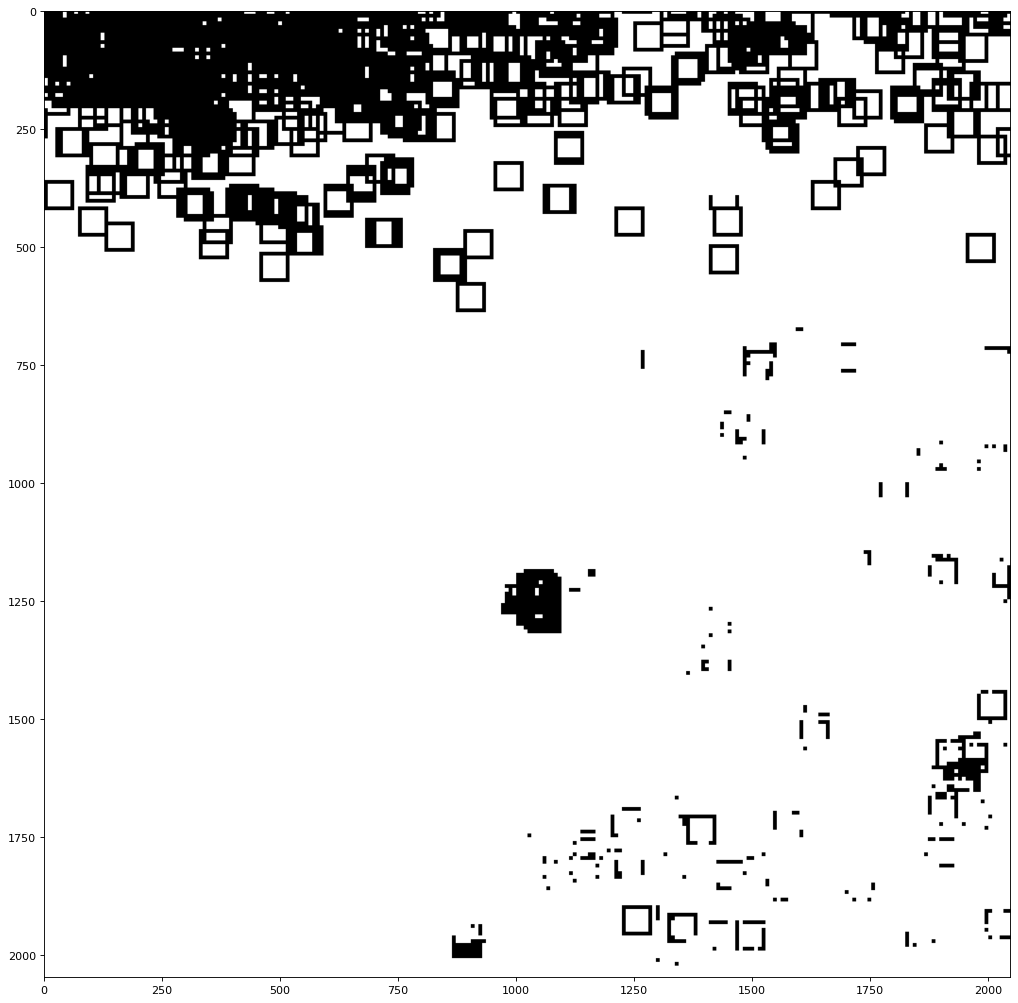

In [62]:
figure(figsize=(16, 16), dpi=80)
plt.imshow(sd, cmap='gray', vmin=0, vmax=255)

## edge detection  

Step 1: filter noise   
Step 2: compute spatial gradient  
Step 3: mark points > threshold as edges

In [110]:
img2 = img.copy()

In [111]:
img_blur = cv2.GaussianBlur(img2, (3,3), 0) 

In [112]:
edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=80) 

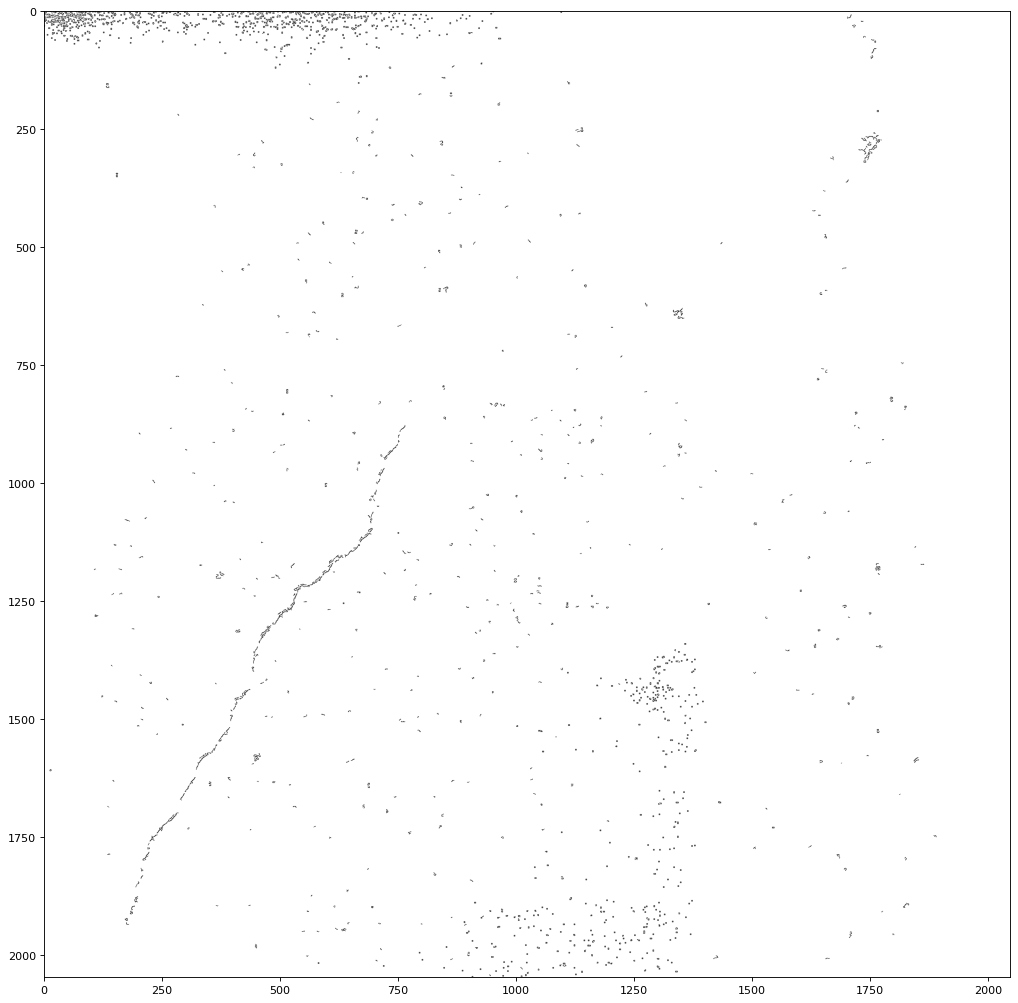

In [113]:
figure(figsize=(16, 16), dpi=80)
plt.imshow(255 - edges, cmap='gray', vmin=0, vmax=255)

In [116]:
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

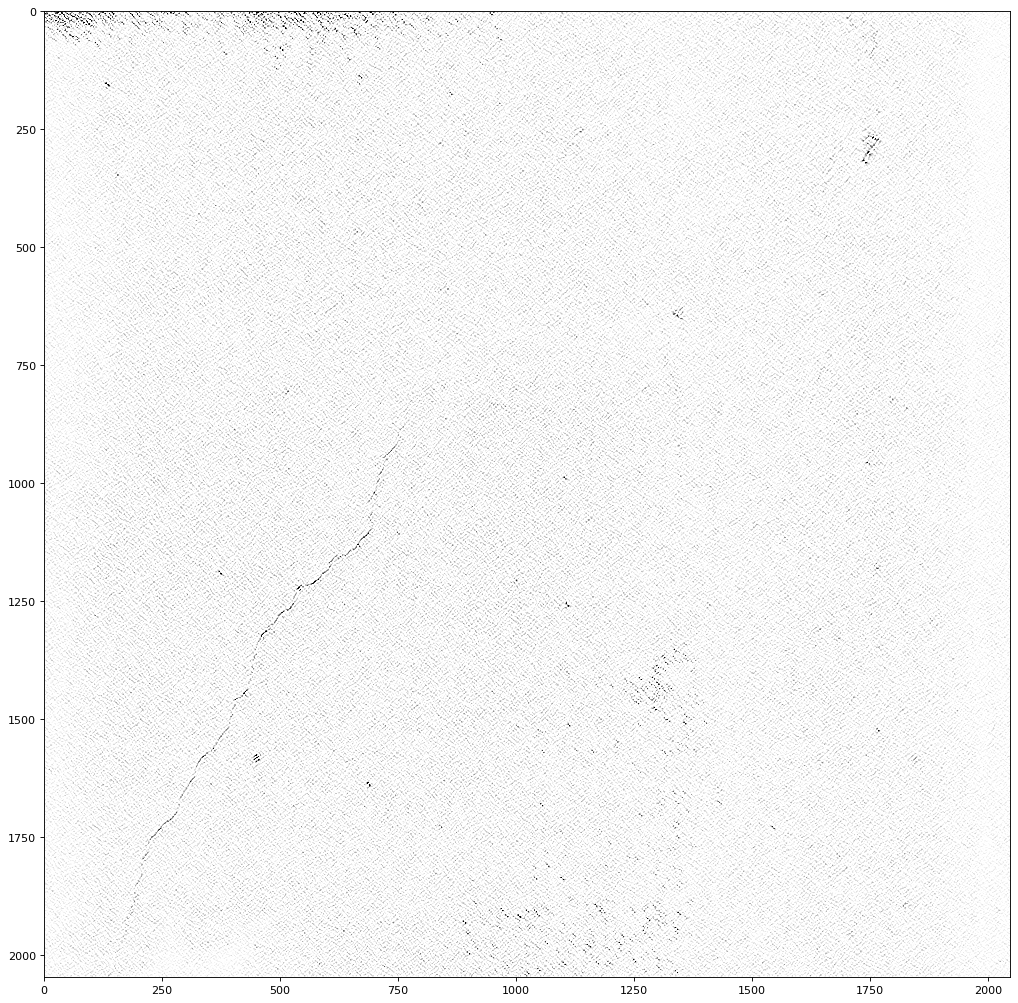

In [117]:
figure(figsize=(16, 16), dpi=80)
plt.imshow(255 - sobelxy, cmap='gray', vmin=0, vmax=255)